In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# 귀무가설 : 감자튀김의 평균무게는 130g이다.
# 대립가설 : 감자튀김의 평균무게는 130g보다 작다.
# 유의 수준은 5%로 설정
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df.무게)
s_mean = sample.mean()
# 표본평균 : A가 산 감자튀김 14개의 평균 무게 = 128.451g

# 임계값 구하기
rv = stats.norm(130, np.sqrt(9/14))
print(rv.isf(0.95),'\n')
# 임계값 : 128.681g
# 검정통계량이 임계값보다 작기때문에 귀무가설은 기각된다.


# 표준화 하여 검정통계량과 임계값의 비교
# 표준화 된 검정 통계량 값
z = (s_mean-130)/np.sqrt(9/14)
print(z,'\n')
# 임계값 : 퍼센트 포인트
rv = stats.norm()
print(rv.isf(0.95) , '\n')
# 검정통계량이 임계값보다 작으므로 귀무가설은 기각

# p값을 활용하여 가설검정
print(rv.cdf(z))
# 유의수준인 0.05보다 작으므로 귀무가설 기각
# 따라서 모평균은 130g보다 작다.

128.68118313069039 

-1.932298779026813 

-1.6448536269514722 

0.026661319523126635


Text(0, 0.5, 'cdf')

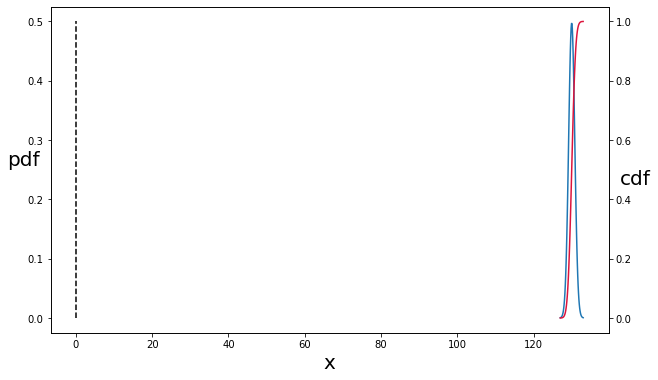

In [11]:
rv = stats.norm(130,np.sqrt(9/14))
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)
ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs),color='crimson')
ax1.vlines(rv.pdf(0.05),0 , 0.5, color = 'black',ls = '--')
ax1.set_xlabel('x',fontsize=20)
ax1.set_ylabel('pdf',rotation = 0, fontsize=20)
ax2.set_ylabel('cdf',rotation = 0, fontsize=20)


In [ ]:
귀무가설 = 감튀 무게의 평균은 130g 이다.
단측검정 = 감튀 무게의 평균은 130g보다 작을 것이다.
양측검정 = 감튀 무게의 평균은 130g이 아니다. (130g보다 작거나 크거나)

In [13]:
# 양측검정
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932298779026813

In [14]:
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [17]:
# 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다
# p값이 0.05 보다 크므로 귀무가설은 기각되지 않는다. '감자튀김 무게의 평균은 130g이 아니다' 라고 말할 수 없다.
rv.cdf(z) * 2

0.05332263904625327

### 가설검정에서의 두가지 오류
- 제 1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
 - 실제로 평균이 130g인데도 '모평균은 130g 보다 작다'라는 결론을 내리는 상황
- 제 2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
 - 모평균은 130g 보다 작다인데도 '모평균은 130g 보다 작다' 라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제 1종 오류는 제어할 수 있지만 제 2종 오류는 제어할 수 없는 비대칭성이 있다.

$\alpha \beta$

In [29]:
# 제 1종 오류를 범할 비율 : 위험률, 유의수준(𝛼), 분석가가 제어할 수 있는 확률
rv = stats.norm(130,3)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean = np.mean(sample_)
    z = (s_mean-130)/np.sqrt(9/14)
    if z < c:
        cnt += 1
cnt / n_samples

0.052

In [24]:
# 제 2종 오류를 범할 비율 : 검정력(1-𝛽), 제어 불가
rv = stats.norm(128,3)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean = np.mean(sample_)
    z = (s_mean-130)/np.sqrt(9/14)
    if z >= c:
        cnt += 1
cnt / n_samples

0.1953

정규분포의 모평균에 대한 검정(모분산을 알고 있음)

In [ ]:
# [과제] 모평균에 대한 검정을 사용자 함수 pmean_test()를 작성하여 감자튀김 사례에 대하여 양측검정으로 수행

In [30]:
# 정규분포의 모분산에 대한 검정
def pvar_test(sample,var0,alpha=0.05):
    u_var = np.var(sample,ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)

    y = (n-1) * u_var / var0
    if interval[0] <= y <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설  기각')
    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

In [31]:
pvar_test(sample,9)

귀무가설 채택
p값은 0.085


 정규분포의 모평균에 대한 검정(모분산을 알지 못함)

In [32]:
def pmean_test(sample, mean0, alpha = 0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample,ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean-mean0) * np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설  기각')
    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

In [36]:
pmean_test(sample,130)

귀무가설 채택
p값은 0.123


In [ ]:
# [과제] 대응표본,독립표본에 대하여 정규분포를 가정하는 경우와 가정할 수 없는 경우의 4가지 유형의 각 사례를 작성
정규분포를 가정
대응표본 - 같은 시간에 수영을 하는 아침반 사람들이 수영을 한달 한 뒤 체중의 변화가 있는지를 검정
독립표본 - 아침반 사람들은 초보자이고 오후반 사람들은 선수반인데 수영을 한달 한 뒤 두반의 체중의 변화가 있는지를 검정

정규분포를 가정할 수 없는 경우
대응표본 - 윌콕슨의 부호순위검정
독립표본 - 윌콕슨의 순위합 검정, 만,위트니의 U검정

In [39]:
data = pd.read_csv('./data/ch11_training_rel.csv')
data['gap'] = data['후'] - data['전']
print(data.shape,'\n',data.head())

(20, 3) 
     전   후  gap
0  59  41  -18
1  52  63   11
2  55  68   13
3  61  59   -2
4  59  84   25


In [40]:
# p값이 유의수준 0.05보다 작으므로 귀무가설을 기각하며 '근력운동은 집중력에 유의한 차이를 가져온다' 라고 할수 있다.
t,p = stats.ttest_1samp(data.gap,0)
p

0.04004419061842953

In [44]:
# 독립표본 t 검정
data = pd.read_csv('./data/ch11_training_ind.csv')
print(data.head())

    A   B
0  47  49
1  50  52
2  37  54
3  60  48
4  39  51


In [45]:
# p값이 0.05 보다 크므로 귀무가설을 채택하며 ' A학생의 학급과 B학생의 학급사이에는 평균 점수에 유의한 차이가 있다고 말할 수 없다''
t,p = stats.ttest_ind(data.A,data.B,equal_var = False)
p

0.08695731107259361

In [46]:
# [과제] 정규분포를 가정할 수 없는 경우 대응표본에 대한 가설검정 수행
data = pd.read_csv('./data/ch11_training_rel.csv')
data1 = data[:6].copy()

In [ ]:
# [과제] 정규분포를 가정할 수 없는 경우 독립표본에 대한 가설검정 수행
data = pd.read_csv('./data/ch11_training_ind.csv')
data2 = data[:5].copy()

In [ ]:
# [과제] 독립성 검정이 필요한 사례 2가지를 작성하세요

In [48]:
df = pd.read_csv('./data/ch11_ad.csv')
print(len(df),'\n',df.head())

1000 
   광고      구입
0  B  하지 않았다
1  B  하지 않았다
2  A      했다
3  A      했다
4  B  하지 않았다


In [ ]:
# 기대도수와 관측도수의 차이를 측정해서 검정 수행

In [51]:
# 교차 집계표
ad_cross = pd.crosstab(df.광고,df.구입)
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [59]:
# p값이 0.05 보다 크므로 귀무가설을 채택하며 광고A와 광고B에 유의미한 차이가 인정되지 않는다고 결론 내릴 수 있다.
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,correction=False)
chi2,p,dof

(3.75, 0.052807511416113395, 1)

In [ ]:
# [과제] 기대도수와 관측도수의 차이를 측정해서 검정 수행